<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="images/book_cover.jpg" width="120">

*This notebook contains an excerpt from the [Python Programming and Numerical Methods - A Guide for Engineers and Scientists](https://www.elsevier.com/books/python-programming-and-numerical-methods/kong/978-0-12-819549-9), the content is also available at [Berkeley Python Numerical Methods](https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html).*

*The copyright of the book belongs to Elsevier. We also have this interactive book online for a better learning experience. The code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work on [Elsevier](https://www.elsevier.com/books/python-programming-and-numerical-methods/kong/978-0-12-819549-9) or [Amazon](https://www.amazon.com/Python-Programming-Numerical-Methods-Scientists/dp/0128195495/ref=sr_1_1?dchild=1&keywords=Python+Programming+and+Numerical+Methods+-+A+Guide+for+Engineers+and+Scientists&qid=1604761352&sr=8-1)!*

<!--NAVIGATION-->
< [22.5 Predictor-Corrector Methods](chapter22.05-Predictor-Corrector-Methods.ipynb) | [Contents](Index.ipynb) | [22.7 Advanced-Topics](chapter22.07-Advanced-Topics.ipynb) >

# Python ODE Solvers

In *scipy*, there are several built-in functions for solving initial value problems. The most common one used is the *scipy.integrate.solve_ivp* function. The function construction are shown below:

**CONSTRUCTION:**  

Let $F$ be a function object to the function that computes 

$$\frac{dS(t)}{dt} = F(t, S(t))$$
$$S(t0)=S0$$

$t$ is a one-dimensional independent variable (time), $S(t)$ is an n-dimensional vector-valued function (state), and the $F(t, S(t))$ defines the differential equations. $S0$ be an initial value for $S$. The function $F$ *must* have the form $dS = F(t, S)$, although the name does not have to be $F$. The goal is to find the $S(t)$ approximately satisfying the differential equations, given the initial value $S(t0)=S0$. 

The way we use the solver to solve the differential equation is: `solve_ivp(fun, t_span, s0, method = 'RK45', t_eval=None)`

where $fun$ takes in the function in the right-hand side of the system. $t\_span$ is the interval of integration $(t0, tf)$, where $t0$ is the start and $tf$ is the end of the interval. $s0$ is the initial state. There are a couple of methods that we can choose, the default is 'RK45', which is the explicit Runge-Kutta method of order 5(4). There are other methods you can use as well, see the end of this section for more information. $t\_eval$ takes in the times at which to store the computed solution, and must be sorted and lie within $t\_span$. 

Let's try one example below. 

**EXAMPLE:** Consider the ODE

$$
\frac{dS(t)}{dt}=\cos(t)
$$

for an initial value $S_0 = 0$. The exact solution to this problem is $S(t) = \sin(t)$. Use *solve\_ivp* to approximate the solution to this initial value problem over the interval $[0, \pi]$. Plot the approximate solution versus the exact solution and the relative error over time.

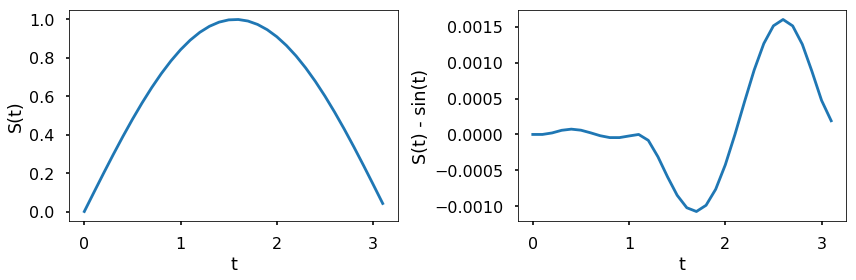

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

plt.style.use('seaborn-poster')

%matplotlib inline

F = lambda t, s: np.cos(t)

t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

The above left figure shows the integration of $\frac{dS(t)}{dt}=\cos(t)$ with *solve\_ivp*. The right figure computes the difference between the solution of the integration by *solve\_ivp* and the evalution of the analytical solution to this ODE. As can be seen from the figure, the difference between the approximate and exact solution to this ODE is small. Also, we can control the relative and absolute tolerances using the *rtol* and *atol* arguments, the solver keeps the local error estimates less than $atol + rtol*abs(S)$. The default values are 1e-3 for rtol and 1e-6 for atol.

**TRY IT!** Using the *rtol* and *atol* to make the difference between the approximate and exact solution is less than 1e-7. 

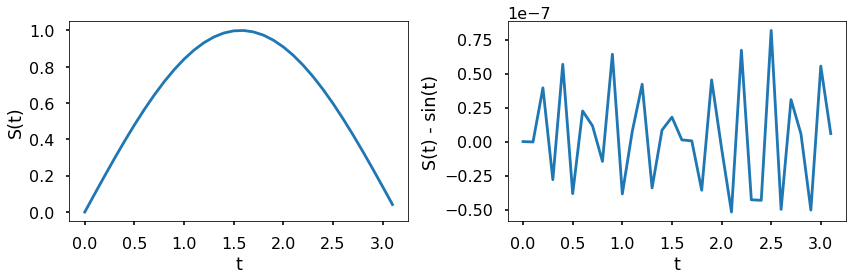

In [2]:
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval, \
                rtol = 1e-8, atol = 1e-8)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()



**EXAMPLE:** Consider the ODE

$$
\frac{dS(t)}{dt} = -S(t),
$$

with an initial value of $S_0 = 1$. The exact solution to this problem is $S(t) = e^{-t}$. Use *solve\_ivp* to approximate the solution to this initial value problem over the interval $[0, 1]$. Plot the approximate solution versus the exact solution, and the relative error over time.

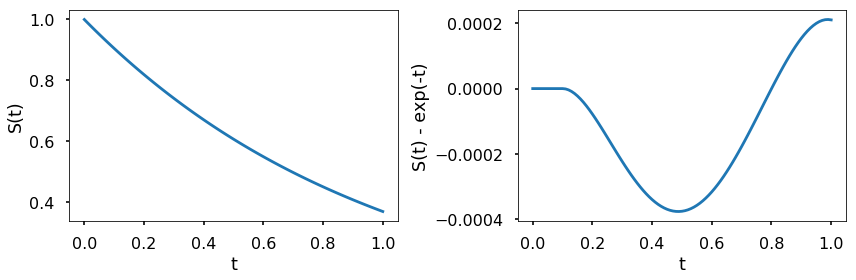

In [3]:
F = lambda t, s: -s

t_eval = np.arange(0, 1.01, 0.01)
sol = solve_ivp(F, [0, 1], [1], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.exp(-sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - exp(-t)')
plt.tight_layout()
plt.show()

The above figure shows the corresponding numerical results. As in the previous example, the difference between the result of *solve\_ivp* and the evaluation of the analytical solution by Python is very small in comparison to the value of the function.

**EXAMPLE:**

Let the state of a system be defined by $S(t) = \left[\begin{array}{c} x(t) \\y(t) \end{array}\right]$, and let the evolution of the system be defined by the ODE

$$
\frac{dS(t)}{dt} = \left[\begin{array}{cc}
0 & t^2 \\
-t & 0
\end{array}\right]S(t).
$$

Use *solve\_ivp* to solve this ODE for the time interval $[0, 10]$ with an initial value of $S_0 = \left[\begin{array}{c} 1 \\1 \end{array}\right]$. Plot the solution in ($x(t), y(t)$).

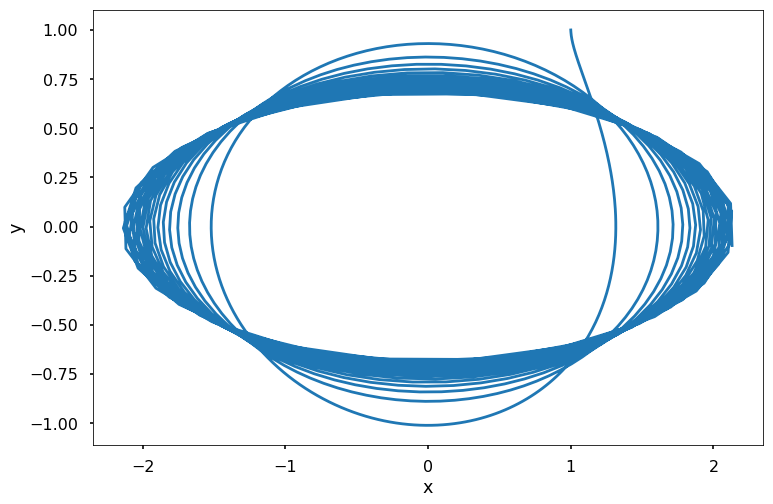

In [4]:
F = lambda t, s: np.dot(np.array([[0, t**2], [-t, 0]]), s)

t_eval = np.arange(0, 10.01, 0.01)
sol = solve_ivp(F, [0, 10], [1, 1], t_eval=t_eval)

plt.figure(figsize = (12, 8))
plt.plot(sol.y.T[:, 0], sol.y.T[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<!--NAVIGATION-->
< [22.5 Predictor-Corrector Methods](chapter22.05-Predictor-Corrector-Methods.ipynb) | [Contents](Index.ipynb) | [22.7 Advanced-Topics](chapter22.07-Advanced-Topics.ipynb) >